In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

In [2]:
conn = sql.connect('database1.sqlite')
conn

In [3]:
pd.read_sql_query('select * from sqlite_master' ,conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [4]:
pd.read_sql_query('select * from salaries',conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [5]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

1. What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [6]:

q= '''SELECT JobTitle, AVG(TotalPayBenefits) AS AverageTotalPayBenefits
       FROM salaries
       WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
       GROUP BY JobTitle'''

sql_query(q)

,JobTitle,AverageTotalPayBenefits
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
4,ACUPUNCTURIST,67594.400000
...,...,...
2153,X-RAY LABORATORY AIDE,52705.880385
2154,X-Ray Laboratory Aide,69521.123200
2155,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2156,Youth Comm Advisor,60118.550000


2. Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [7]:

q = '''SELECT Year, JobTitle, COUNT(*) AS EmployeeCount
       FROM salaries
       WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
       GROUP BY Year, JobTitle
       ORDER BY Year, EmployeeCount DESC'''

sql_query(q)

,Year,JobTitle,EmployeeCount
0,2011,TRANSIT OPERATOR,2388
1,2011,SPECIAL NURSE,1402
2,2011,REGISTERED NURSE,1219
3,2011,CUSTODIAN,796
4,2011,FIREFIGHTER,794
...,...,...,...
4131,2014,"Administrator, DPH",1
4132,2014,Administrative Hearing Sup,1
4133,2014,"Adm, SFGH Medical Center",1
4134,2014,Acupuncturist,1


3. What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [8]:

q = '''
SELECT COUNT(DISTINCT EmployeeName) AS UniqueEmployeeCount
FROM salaries
WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
'''

sql_query(q)

,UniqueEmployeeCount
0,110810


4. Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [9]:

q = '''SELECT EmployeeName, TotalPayBenefits
       FROM salaries
       WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
       ORDER BY TotalPayBenefits DESC'''

sql_query(q)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,510732.68
3,Amy P Hart,479652.21
4,William J Coaker Jr.,436224.36
...,...,...
148645,Roy I Tillery,0.00
148646,Timothy E Gibson,-2.73
148647,Mark E Laherty,-8.20
148648,David P Kucia,-33.89


5. Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [10]:

q = '''SELECT EmployeeName, JobTitle, TotalPayBenefits
       FROM salaries
       WHERE TotalPayBenefits BETWEEN 125000 AND 150000
       AND JobTitle = 'Firefighter'
       AND JobTitle NOT IN ('Not Provided', 'Not provided')'''

sql_query(q)

,EmployeeName,JobTitle,TotalPayBenefits
0,Randall Henderson,Firefighter,147912.75
1,Virginia Cheung,Firefighter,147862.14
2,Travis Hemenez,Firefighter,147664.12
3,Gail Readdie,Firefighter,147452.17
4,Gregory Ginotti,Firefighter,147216.47
...,...,...,...
110,Stephen J Kloster,Firefighter,126784.13
111,Jeffrey D Ryan,Firefighter,126687.13
112,Jovan R Blake,Firefighter,126169.62
113,Dino M Cafferata,Firefighter,125680.52


6. How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')


In [11]:

q = '''SELECT COUNT(*) AS EmployeeCount
       FROM salaries
       WHERE OvertimePay = 0 
       AND OtherPay = 0
       AND JobTitle NOT IN ('Not Provided', 'Not provided')'''

sql_query(q)

,EmployeeCount
0,34655


7. Show top 10 employees having (overtimepay+OtherPay) in bar plot?  exclude ('Not Provided', 'Not provided')

In [12]:


q = '''SELECT EmployeeName, (OvertimePay + OtherPay) AS TotalAdditionalPay
       FROM salaries
       WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
       ORDER BY TotalAdditionalPay DESC
       LIMIT 10'''

sql_query(q)


,EmployeeName,TotalAdditionalPay
0,NATHANIEL FORD,400184.25
1,GARY JIMENEZ,382943.26
2,David Shinn,342802.63
3,CHRISTOPHER CHONG,254427.61
4,John Goldberg,245999.41
5,Gary Altenberg,234035.79
6,Khoa Trinh,224472.73
7,ALSON LEE,223489.04
8,Brendan A Ward,216637.92
9,Whitney P Yee,213311.84


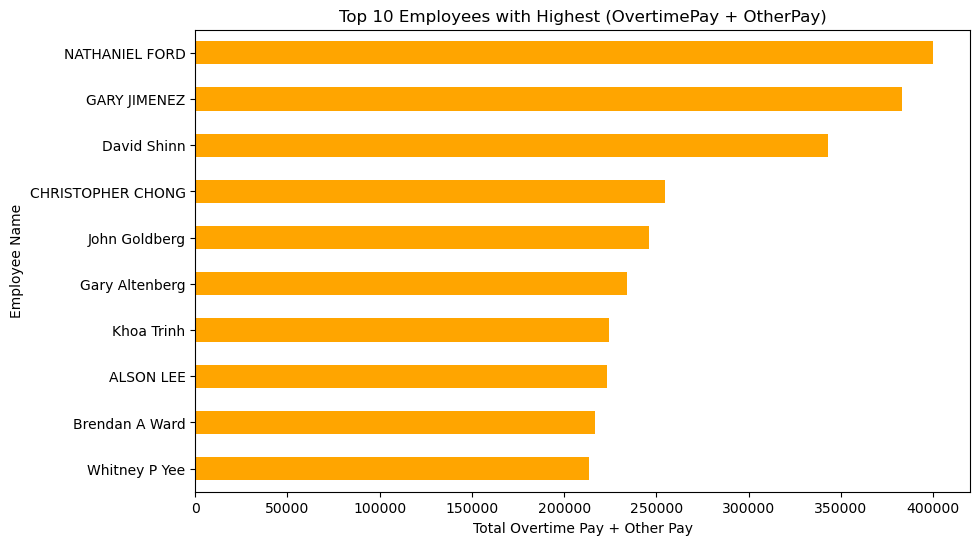

In [13]:
df_top_10 = sql_query(q)

df_top_10.plot(kind='barh', 
               x='EmployeeName', 
               y='TotalAdditionalPay', 
               color='orange', 
               figsize=(10, 6), 
               legend=False)


plt.xlabel('Total Overtime Pay + Other Pay')
plt.ylabel('Employee Name')
plt.title('Top 10 Employees with Highest (OvertimePay + OtherPay)')
plt.gca().invert_yaxis()
plt.show()


8. Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')


In [14]:

q = '''SELECT AVG(BasePay) AS AvgBasePay, 
              AVG(OvertimePay) AS AvgOvertimePay, 
              AVG(OtherPay) AS AvgOtherPay
       FROM salaries
       WHERE JobTitle NOT IN ('Not Provided', 'Not provided')'''

sql_query(q)

,AvgBasePay,AvgOvertimePay,AvgOtherPay
0,66055.506718,5066.059886,3648.767297


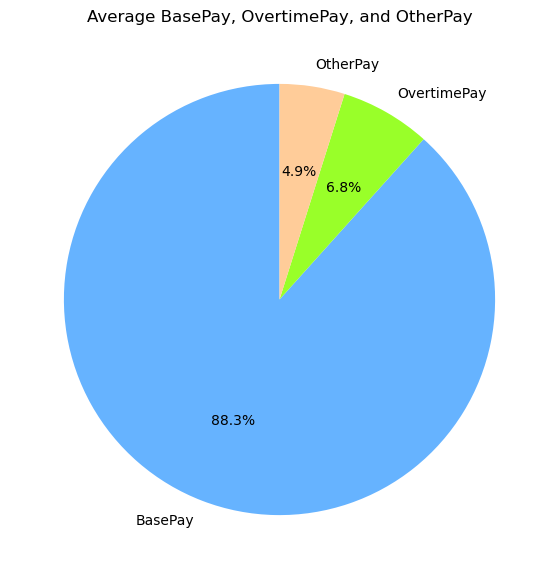

In [15]:
df_avg = sql_query(q)

avg_values = df_avg.iloc[0]
avg_values.plot(kind='pie', 
                labels=['BasePay', 'OvertimePay', 'OtherPay'], 
                autopct='%1.1f%%', 
                colors=['#66b3ff', '#99ff29', '#ffcc99'], 
                figsize=(7, 7), 
                startangle=90, 
                legend=False)

plt.title('Average BasePay, OvertimePay, and OtherPay')
plt.ylabel('')
plt.show()

9. Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')


In [16]:

q='''SELECT JobTitle, AVG(TotalPayBenefits) AS AverageTotalPayBenefits
FROM salaries
WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
GROUP BY JobTitle
HAVING AVG(TotalPayBenefits) > 75000
order by 2
'''

sql_query(q)

,JobTitle,AverageTotalPayBenefits
0,Asst Electronic Main Tech,75035.117222
1,Senior Legal Process Clerk,75108.724532
2,Community Development Asst,75246.657391
3,CABLE SPLICER,75255.005833
4,"OPERATING ENGINEER, UNIVERSAL",75273.754200
...,...,...
1432,"Gen Mgr, Public Trnsp Dept",380696.440000
1433,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
1434,"Chief, Fire Department",408865.326667
1435,Chief of Police,411732.266667


10. Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10?  exclude ('Not Provided', 'Not provided')


In [17]:

q='''SELECT JobTitle, COUNT(EmployeeName) AS EmployeeCount
FROM salaries
WHERE JobTitle NOT IN ('Not Provided', 'Not provided')
GROUP BY JobTitle
HAVING COUNT(EmployeeName) > 10
order by 2 desc'''

sql_query(q)

,JobTitle,EmployeeCount
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421
...,...,...
1151,AUTOMOTIVE MECHANIC ASSISTANT SUPERVISOR,11
1152,ASSOCIATE PERFORMANCE AUDITOR,11
1153,ASSISTANT ELECTRONIC MAINTENANCE TECHNICIAN,11
1154,ARTS PROGRAM ASSISTANT,11
